 Import dependencies

In [ ]:
from g
oogle.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score

data collection and preprocessing

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/loan.csv')

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data = loan_data.dropna()

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

label encoding

In [ ]:
# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
loan_data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
loan_data = loan_data.replace(to_replace='3+',value=4)

In [ ]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [ ]:
loan_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000


In [ ]:
loan_data = loan_data.drop(columns='Loan_ID',axis=1)

In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [ ]:
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

DAta Viz

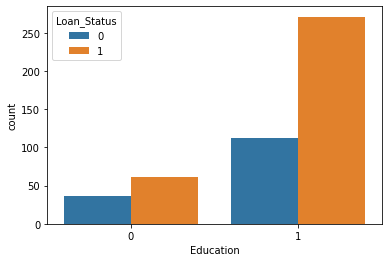

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)


Applicants with education has more chance of loan approval


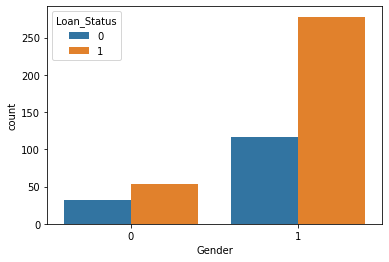

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)


Male applicants had better chance of loan approval

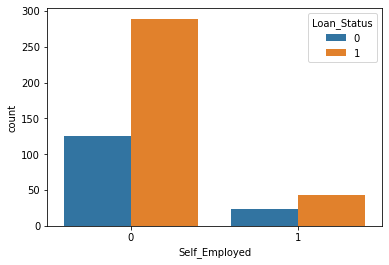

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)


self employed peple had greater chance of loan approval

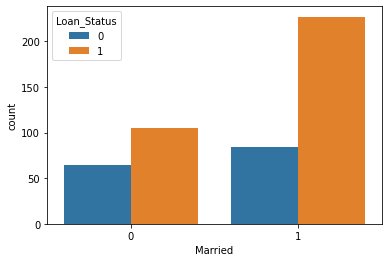

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)


Chances of married people getting a loan are higher

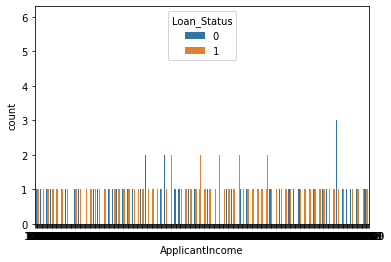

In [ ]:
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=loan_data)


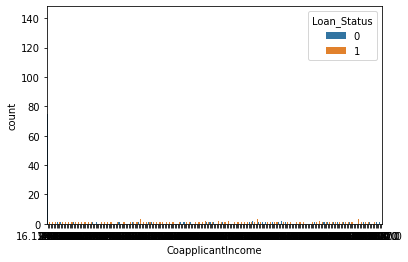

In [ ]:
sns.countplot(x='CoapplicantIncome',hue='Loan_Status',data=loan_data)

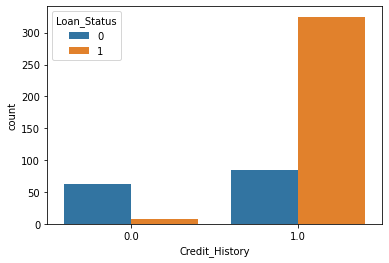

In [ ]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_data)


applicant with credit history had higher loan approval

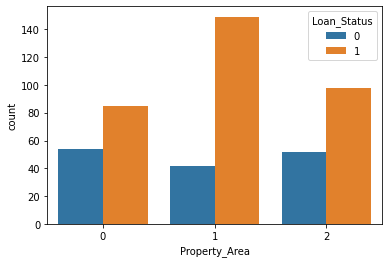

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)


Appliants with property had a high chance of loan approval

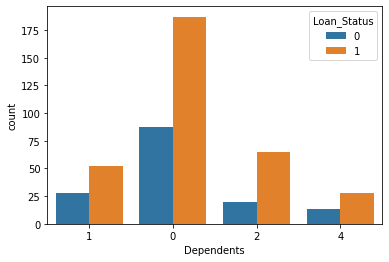

In [ ]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data)

People without any dependent had highest loan approval 

SPlit features into X and target into Y



In [ ]:
X = loan_data.drop(columns=['Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

Train test split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

model evaluation

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

Accuracy

In [ ]:
train_predict = classifier.predict(X_train)
accuracy = accuracy_score(train_predict,Y_train)

In [ ]:
print(accuracy)

0.7986111111111112


In [ ]:
test_predict = classifier.predict(X_test)
accuracytest = accuracy_score(test_predict,Y_test)
print(accuracytest)

0.8333333333333334


predictive system

In [ ]:
userInput=input()
userInput=userInput.replace(" ","").split(",")
userInput=[np.float32(c) for c in userInput]
print(userInput)

0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1
[0.0, 0.0, 0.0, 1.0, 1.0, 4583.0, 0.0, 133.0, 360.0, 0.0, 1.0]


In [ ]:

input_numpy_as_array = np.asarray(userInput)

#reshape 
input_reshape = input_numpy_as_array.reshape(1,-1)

#model predict
input_data_predict = classifier.predict(input_reshape)
print(input_data_predict)
if(input_data_predict[0]==0):
  print('Loan Rejected')
else:
  print('accepted')

[0]
Loan Rejected


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
